# Data analysis notebook
This helps analyze any results recieved from the YIPPEE csv output.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import haversine

In [30]:
# DATA IMPORT
# Relative path to the data directory
from IPython import extract_module_locals

this_dir, this_filename = os.path.split("/".join(
    extract_module_locals()[1]["__vsc_ipynb_file__"].split("/")[-5:]
) )
# Navigate 1 folders up, then into mem_dumps/
os.chdir(os.path.join(this_dir, '..', '..', 'mem_dumps'))

# DATA FILES MUST BE ENTERED IN (TITLE, FILENAME) FORMAT (Files are retrieved from the mem_dumps folder).
# ALTERNATIVELY, YOU CAN DIRECTLY ENTER A PANDAS DATAFRAME.
# ============ ENTER YOUR DATA FILES HERE ============
my_flight = ("MY_FLIGHT", "opel_test.csv")

In [31]:
# UTILITIES
# ============ DO NOT EDIT BELOW THIS LINE ============
def parse_file(dataframe_or_filename):
    if isinstance(dataframe_or_filename, pd.DataFrame):
        return dataframe_or_filename
    else:
        return pd.read_csv(dataframe_or_filename, sep=',', header=0, index_col=0)

In [ ]:
# PLOTTING FUNCTIONS
# --------------------------------------------------------------------
def plot_alts_vs_time(flight):
    flight_title, flight_df = flight
    flight_df = parse_file(flight_df)

    # Create a new figure
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle(flight_title, fontsize=16)
    ax.plot(flight_df['realtime'], flight_df['gps_altitude'], label='GPS Altitude', color='blue', linewidth=2)
    ax.plot(flight_df['realtime'], flight_df['baro_altitude'], label='Barometer Altitude', color='red', linewidth=2)
    ax.set_xlabel('Time since Launch Detect (s)', fontsize=14)
    ax.set_ylabel('Altitude (m)', fontsize=14)
    ax.set_title('Altitude vs Time', fontsize=16)
    ax.legend(loc='upper right', fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Set the limits
    ax.set_xlim(flight_df['realtime'].min(), flight_df['realtime'].max())
    ax.set_ylim(0, flight_df[['gps_altitude', 'baro_altitude']].max().max() + 10)

    # Vertical line at launch detect, fainter
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

    plt.show()
    

def plot_gps_displacement_vs_time(flight):
    

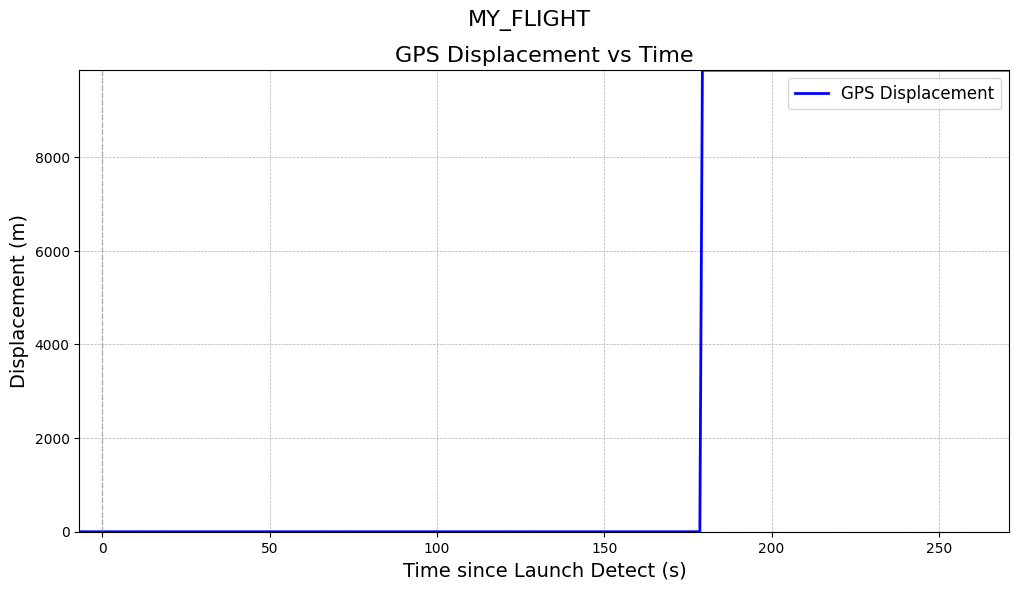

In [ ]:
plot_gps_displacement(my_flight)